# 1、将图片合成为视频

In [1]:
import cv2 as cv
import glob
import time 
import os
import tqdm
import matplotlib.pyplot as plt

In [2]:
# 定义函数
def resizeImages(imgsPath, size):
    imgs_path = glob.glob(imgsPath + "/" + "*.jpg")
    for imgPath in tqdm.tqdm(imgs_path):
        originalImage = cv.imread(imgPath)
        img_resized = cv.resize(originalImage, size)
        cv.imwrite(imgPath, img_resized)
    


def img2video(imgsPath, fps, size):
    imgs_path = glob.glob(imgsPath + "/" + "*.jpg")
    out_dir = "./test_videos"
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    outVideo_path = out_dir + '/' + str(int(time.time())) + '.avi'
    fourcc = cv.VideoWriter_fourcc('I', '4', '2', '0')
    video = cv.VideoWriter(outVideo_path, fourcc, fps, size)
    for imgPath in tqdm.tqdm(imgs_path):
        img = cv.imread(imgPath)
        video.write(img)
    video.release()
    cv.destroyAllWindows()

In [3]:
imgsPath_test = "test_videos/temp"

In [4]:
# 批量更改图片尺寸
resizeImages(imgsPath_test, size=(880, 640))

100%|██████████| 11/11 [00:00<00:00, 54.01it/s]


In [5]:
# 图片合成视频
img2video(imgsPath_test, 1, (880, 640))

100%|██████████| 11/11 [00:00<00:00, 87.60it/s]


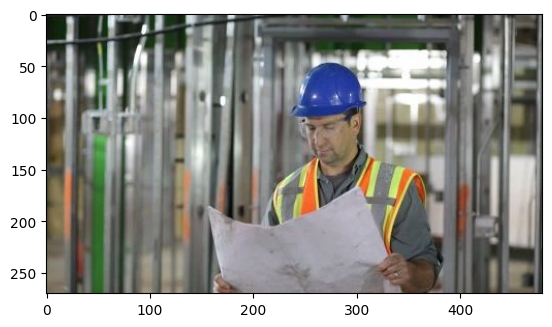

In [12]:
imgs_path = glob.glob(imgsPath_test + "/" + "*.jpg")
img = imgs_path[0]
img = cv.imread(img)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

True

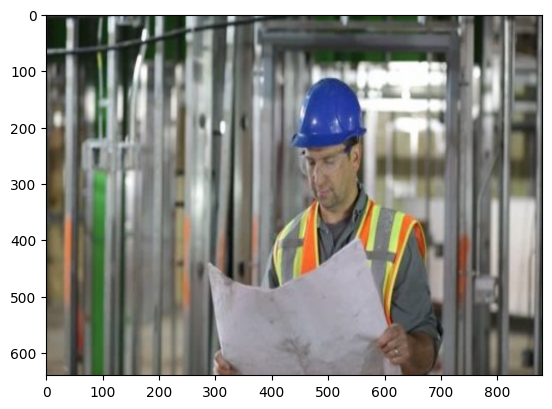

In [14]:
img_resized = cv.resize(img, (880, 640))
plt.imshow(cv.cvtColor(img_resized, cv.COLOR_BGR2RGB))
cv.imwrite(imgs_path[0], img_resized)